In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines
import math
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('Salary_Data.csv')

In [4]:
data['IsHighSalary'] = data['Salary'] >= 100000
data['IsHighSalary'] = pd.get_dummies(data['IsHighSalary'], drop_first=True)
data.tail(10)

,YearsExperience,Salary,IsHighSalary
20,6.8,91738.0,0
21,7.1,98273.0,0
22,7.9,101302.0,1
23,8.2,113812.0,1
24,8.7,109431.0,1
25,9.0,105582.0,1
26,9.5,116969.0,1
27,9.6,112635.0,1
28,10.3,122391.0,1
29,10.5,121872.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
 2   IsHighSalary     30 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 638.0 bytes


In [6]:
X = data['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [7]:
y = data['IsHighSalary']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: IsHighSalary, dtype: uint8

<Figure size 1200x600 with 0 Axes>

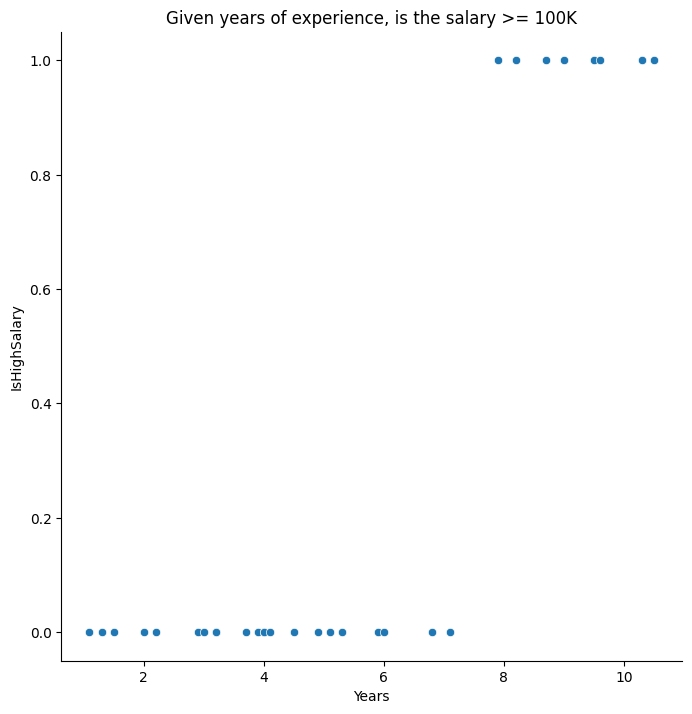

In [8]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['IsHighSalary'],height=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('IsHighSalary')
plt.title('Given years of experience, is the salary >= 100K')
plt.show()

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=10)

In [10]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

/var/folders/vw/cpbvgzfx637fhssyvwr4s9y80000gn/T/ipykernel_1770/2733214152.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]
/var/folders/vw/cpbvgzfx637fhssyvwr4s9y80000gn/T/ipykernel_1770/2733214152.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred = lr.predict(X_test)

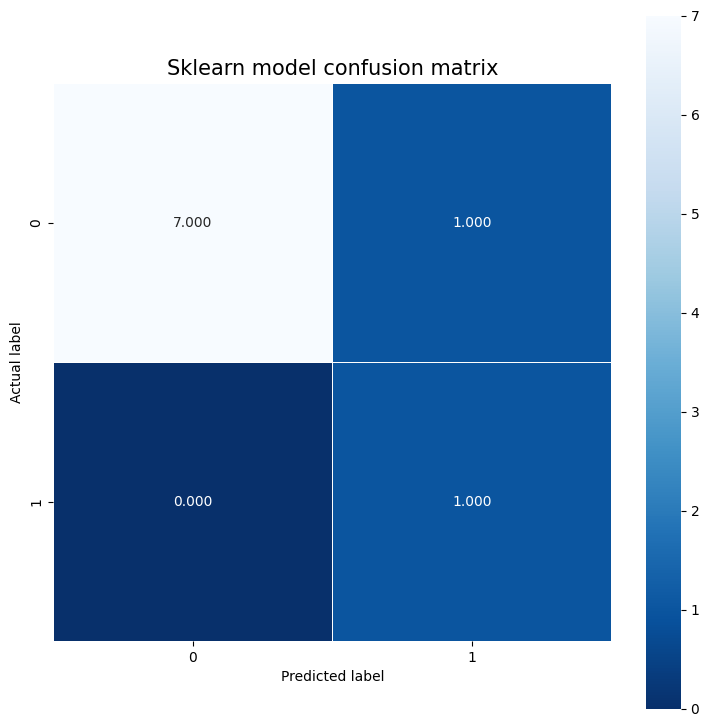

In [14]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Sklearn model confusion matrix', size = 15);

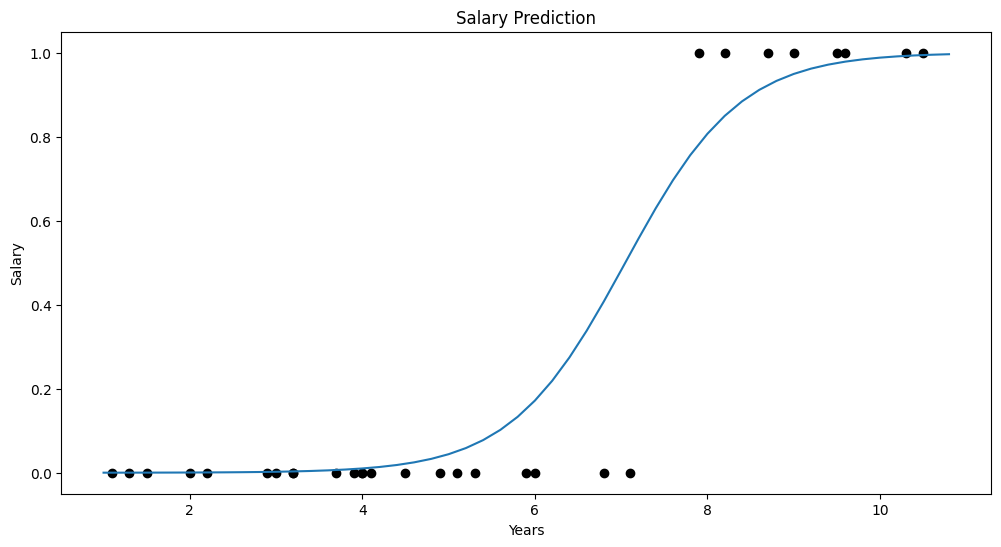

In [15]:
def model(x):
    exponent = lr.intercept_ + lr.coef_[0] * x
    return 1/(1+math.exp(-exponent))

x = np.arange(1, 11., 0.2)
sig = [model(i) for i in x]


plt.figure(figsize=(12,6))
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.scatter(data['YearsExperience'], data['IsHighSalary'], c='black')
plt.plot(x,sig)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test,y_pred)

0.8888888888888888

In [18]:
accuracy_score(y_test,y_pred)*100

88.88888888888889